<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re 

from functools import reduce
from collections import defaultdict
from scipy import stats

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_customers_dataset.csv',
 'groceries.csv',
 'test.csv',
 'lead_conversion.csv',
 'ab_experiment.csv',
 'match_result_test.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sales.csv',
 'app_wau.csv',
 'online_retail.xlsx',
 'sales_vs_discount.csv',
 'sample-sales-data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 '1_orders_dataset.csv',
 'cookie_cats.csv',
 'bz_data_analyis.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'sales_data_with_stores.csv',
 '1_order_payments_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [4]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
cnt = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns ={'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


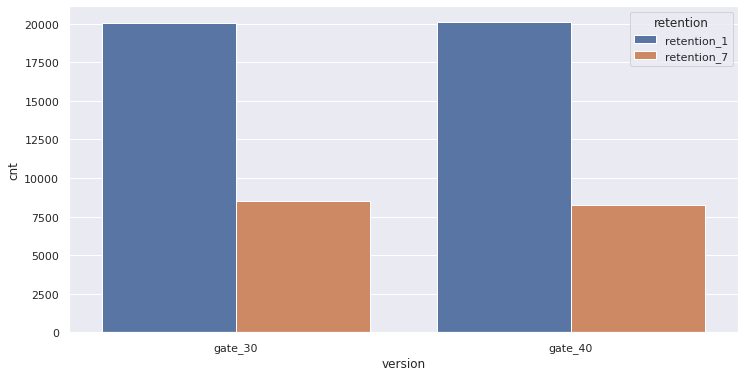

In [7]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(data = cnt, x = 'version', y = 'cnt', hue = 'retention')
plt.show()

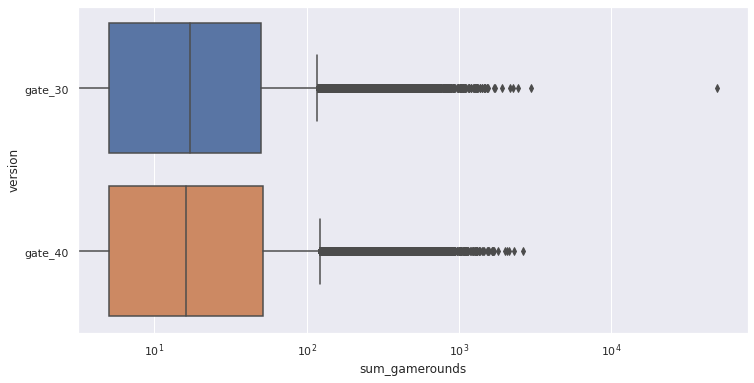

In [11]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, y = 'version', x = 'sum_gamerounds')
ax.set_xscale('log')
plt.show()

In [12]:
df = df[df['sum_gamerounds'] < 10000]

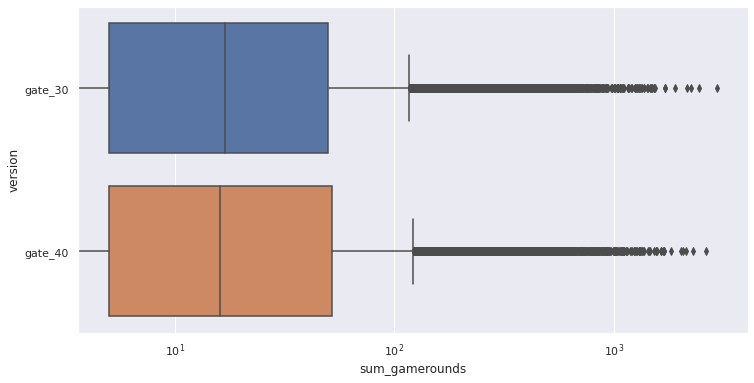

In [13]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, y = 'version', x = 'sum_gamerounds')
ax.set_xscale('log')
plt.show()

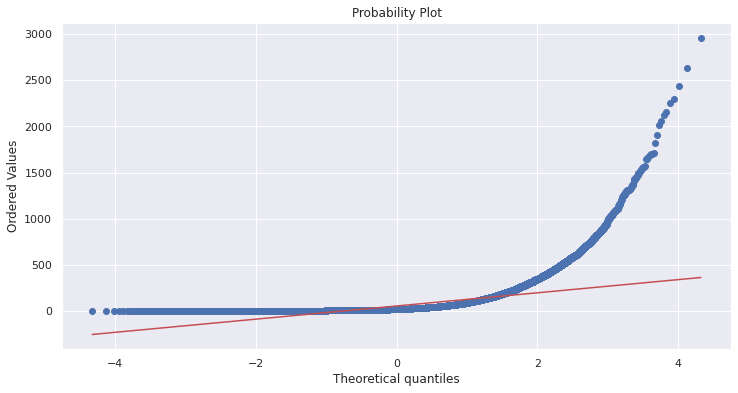

In [14]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [15]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat),'\n',str(p))

18528909.99029161 
 0.0


## Non-Parametric Test
### Probability Samplling

* For non-parametric test,
  * we are trying to **compare** the **sample mean or sample median** of verision A and B. 
  * It needs resampling method: Bootstrapping and Boostrap Quantile method, respectively.

* `Bootstrapping` is a statistical procedure that **resamples a single dataset** to **create many simulated samples**.
* `Boostrap Quantile` is a **quantile estimator** that is the `median of a set of quantiles` calculated by `re-sampling the original sample` a large number of times and `computing a quantile for each sample`

In [17]:
n = 1000
boot = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boot.head()

version,gate_30,gate_40
sum_gamerounds,51.623315,50.538428
sum_gamerounds,50.650303,48.339623
sum_gamerounds,50.621677,50.336509
sum_gamerounds,53.549503,50.154298
sum_gamerounds,50.210668,52.381172


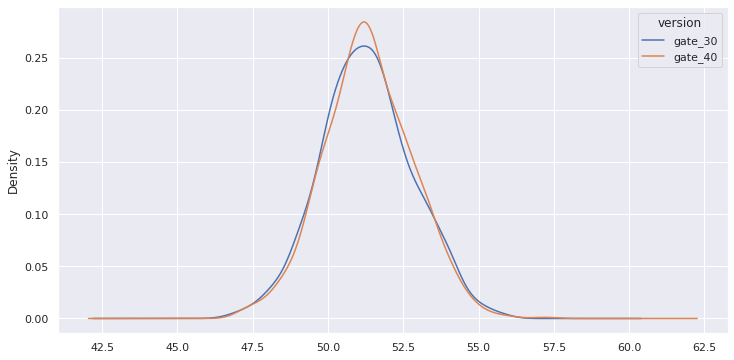

In [18]:
boot.plot.kde()

In [19]:
diff = boot['gate_30'] - boot['gate_40']
len(diff[diff > 0]) / n

0.494

* If the `p-value` is **larger than the chosen significance level** 
  * p-value > (choosen) siginificance level
* then we can state that we **can’t reject the null**. 
* Hence, there is `not enough evidence` to state that 
* there is a statistically `significant difference` in Control 
* and Experimental sample means.

### Confidence Interval (CI) 
* **a range of values** that is likely to **contain the true population parameter** with a `certain degree of confidence`. 
* The CI is calculated based on the `sample statistics` and a `chosen level of confidence`, such as `95% or 99%`, `신뢰구간`
  * which represents the `likelihood` that the **interval contains the true population parameter**. 
* In non-probability sampling, 
  * the `confidence interval` may **not accurately reflect the true population parameter** due to the `potential for selection bias`.

In [ ]:
alpha = 0.05
z_mean = np.mean(boot['gate_30'])- np.mean(boot['gate_40']) # 평균
z_sigma = np.sqrt((np.var(bootstrap_sum['B'])/n + np.var(bootstrap_sum['A'])/n)) # 분산
print("           Mean of (verison B - verison A):", z_mean)
print("Standard Error of (verison B -  verison A):", z_sigma)
print("             CI of (verison B - verison A):", [z_mean - norm.ppf(1-alpha/2)*z_sigma, z_mean + norm.ppf(1-alpha/2)*z_sigma] )

In [24]:
cl = np.percentile(diff, [2.5, 97.5])
cl

array([-4.22682407,  3.88837769])

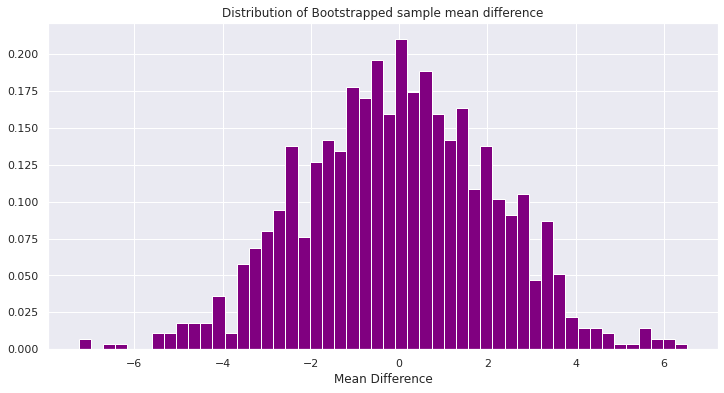

In [21]:
plt.hist(diff, bins = 50, density = True, color ='purple')
plt.xlabel('Mean Difference')
plt.title('Distribution of Bootstrapped sample mean difference')
plt.show()

### Probability & Likelihood
#### Probability 
* the degree of certainty that an event will occur. 
* It is a measure of the long-term frequency of an event in a large number of repetitions. 
* In Bayesian statistics, probability is used to represent a degree of belief in a hypothesis or an event, 
  * and is updated based on new information.

#### Likelihood
* a measure of the compatibility of a given set of data with a particular hypothesis or model. 
* The likelihood function represents the probability of observing a particular set of data given a set of model parameters. In Bayesian statistics, the likelihood is combined with prior knowledge to calculate the posterior probability, which represents the updated belief in the hypothesis or event given the new data.

* In summary, probability is a measure of belief in an event, while likelihood is a measure of the fit between a set of data and a particular hypothesis or model.

# Iterators

In [25]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [26]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}